In [1]:
# mounting google drive to the colob for files access
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Imporing required libraries
import tensorflow as tf
from keras.utils import to_categorical 
import numpy as np
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import h5py

Using TensorFlow backend.


In [3]:
# Defining dictionary to map output class to dance form
d={0:'manipuri',1:'bharatanatyam',2:'odissi',3:'kathakali',4:'kathak',5:'sattriya',6:'kuchipudi',7:'mohiniyattam'}

In [4]:
# Reading training file from drive in h5 format (File is saved in h5 format)
with h5py.File("/content/gdrive/My Drive/Dance_train.h5","r") as hdf:
    data1=hdf.get('X')
    data2=hdf.get('Y')
    X=np.array(data1)
    Y=np.array(data2)

In [5]:
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
print("Train data input shape is :",X.shape)

Train data input shape is : (364, 256, 256, 1)


In [6]:
# Normalizing values
X=X/255

In [7]:
# Converting ouput to categotical class
Y=to_categorical(Y)
print("Train data ouput shape is :",Y.shape)

Train data ouput shape is : (364, 8)


In [8]:
# Defining model sequential object
model=Sequential()

In [9]:
# Neural network layers 
model.add(Conv2D(2,kernel_size=3,strides=(1,1),activation="relu",input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid"))
model.add(Dense(32,activation="relu",kernel_regularizer="l2"))
model.add(Dropout(0.3))
model.add(Conv2D(4,kernel_size=3,strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid"))
model.add(Dense(64,activation="relu",kernel_regularizer="l2"))
model.add(Dropout(0.3))
model.add(Conv2D(8,kernel_size=3,strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="valid"))
model.add(Dense(64,activation="relu",kernel_regularizer="l2"))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [11]:
# training model with batch_size
hist=model.fit(X,Y,epochs=50,batch_size=8)

Epoch 1/50
364/364 [==============================] - 3s 8ms/step - loss: 2.2731 - accuracy: 0.1209
Epoch 2/50
364/364 [==============================] - 1s 4ms/step - loss: 2.0492 - accuracy: 0.2555
Epoch 3/50
364/364 [==============================] - 1s 4ms/step - loss: 1.4501 - accuracy: 0.5495
Epoch 4/50
364/364 [==============================] - 1s 4ms/step - loss: 0.8047 - accuracy: 0.7802
Epoch 5/50
364/364 [==============================] - 1s 4ms/step - loss: 0.4353 - accuracy: 0.9038
Epoch 6/50
364/364 [==============================] - 1s 4ms/step - loss: 0.2691 - accuracy: 0.9670
Epoch 7/50
364/364 [==============================] - 1s 4ms/step - loss: 0.1507 - accuracy: 0.9808
Epoch 8/50
364/364 [==============================] - 1s 4ms/step - loss: 0.1294 - accuracy: 0.9890
Epoch 9/50
364/364 [==============================] - 1s 4ms/step - loss: 0.1120 - accuracy: 0.9945
Epoch 10/50
364/364 [==============================] - 1s 4ms/step - loss: 0.0938 - accuracy: 1.0000

In [12]:
# evaluating training data
pred=model.evaluate(X,Y)
print("Cost is :",pred[0])
print("Training accuracy is :",pred[1])

364/364 [==============================] - 1s 2ms/step
Cost is : 0.02093994836476478
Training accuracy is : 1.0


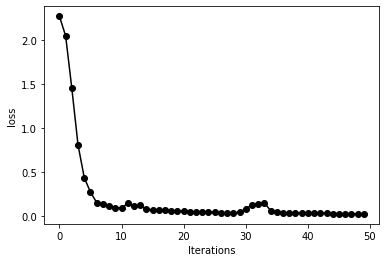

In [13]:
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.plot(list(hist.history.values())[0],'k-o')

In [14]:
# Reading test dataset from drive
with h5py.File("/content/gdrive/My Drive/Dance_test.h5","r") as hdf:
    data1=hdf.get('X')
    Xtest=np.array(data1)

In [15]:
# normalize test values
Xtest=Xtest/255
Xtest=Xtest.reshape((Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1))
print("Test data shape is :",Xtest.shape)

Test data shape is : (156, 256, 256, 1)


In [16]:
# predicting test data class
pr=model.predict(Xtest)

In [17]:

print("Test data output shape :",pr.shape)

Test data output shape : (156, 8)


In [18]:
# Reading test csv file to get test image name to create prediction csv file
image=pd.read_csv("/content/gdrive/My Drive/test.csv")

In [19]:
image

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg
...,...
151,366.jpg
152,226.jpg
153,35.jpg
154,458.jpg


In [20]:
# Assigning dance class name based on prediction 
l1=list()
for i in range(0,len(pr)):
    temp=list()
    temp.append(image['Image'][i])
    pp=np.argmax(pr[i])
    temp.append(d[pp])
    l1.append(temp)

In [21]:
# Creating dataframe to input prediction class
df1=pd.DataFrame(l1,columns=['Image','target'])

In [22]:
df1

,Image,target
0,508.jpg,sattriya
1,246.jpg,kathakali
2,473.jpg,odissi
3,485.jpg,odissi
4,128.jpg,kathak
...,...,...
151,366.jpg,sattriya
152,226.jpg,kathakali
153,35.jpg,kathak
154,458.jpg,odissi


In [23]:
# Saving prediction csv file to upload 
df1.to_csv('/content/gdrive/My Drive/dance_prediction.csv')